In [1]:
# Tries to identify cycling interval activities because these were the highest in PeakZone performace
# Two such activities are numbers 37 and 116

In [2]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import pickle
from matplotlib.dates import DateFormatter
from pandas.plotting import register_matplotlib_converters
from collections import Counter
from scipy import signal

In [3]:
DFs=pickle.load(open('DFs.pkl', 'rb'))
Summaries=pickle.load(open('Summaries.pkl', 'rb'))
print(len(DFs),len(Summaries))

357 357


In [4]:
myFormat = DateFormatter("%H:%M")
register_matplotlib_converters(myFormat)

In [5]:
%matplotlib inline

def plotHeartRate(df,summary):

    m=df['BPM'].mean()
    length=len(df)
    t = np.arange(start=0, stop=length, step=1)
    
    fig, axs0 = plt.subplots(nrows=1, ncols=1, figsize=(15, 2) )
    axs0.plot( t, df['BPM']-m)  
    axs0.set_xlabel('Number in Sequence')
    axs0.set_ylabel('BPM')
    axs0.set_title( summary['string'] )
    axs0.grid(True)
            
    fig.tight_layout()
    plt.show()

# end plotHeartRate

In [6]:
%matplotlib inline

def plotHeartRateWithTime(df,summary):

    m=df['BPM'].mean()
    
    fig, axs0 = plt.subplots(nrows=1, ncols=1, figsize=(15, 2) )
    axs0.plot(  df['dateTime'], df['BPM']-m)  
    axs0.set_xlabel('Time')
    axs0.set_ylabel('BPM')
    axs0.set_title( summary['string'] )
    axs0.grid(True)
    axs0.xaxis.set_major_formatter(myFormat)
        
    fig.tight_layout()
    plt.show()

# end plotHeartRateWithTime

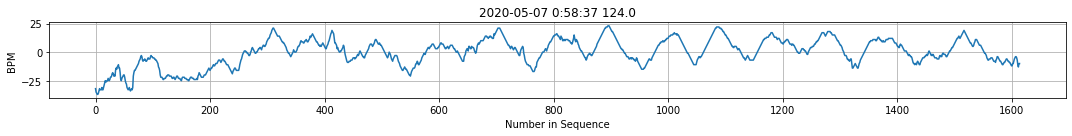

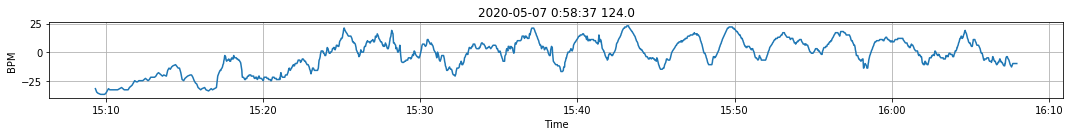

In [7]:
plotHeartRate(DFs[37],Summaries[37])
plotHeartRateWithTime(DFs[37],Summaries[37])

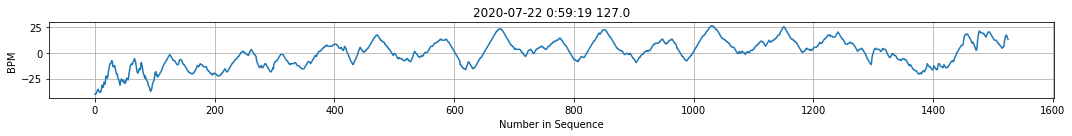

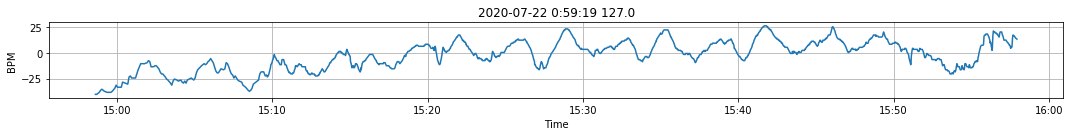

In [8]:
plotHeartRate(DFs[116],Summaries[116])
plotHeartRateWithTime(DFs[116],Summaries[116])

In [9]:
df=DFs[37]
deltas=[]
for i in range(len(df)-1):
    delta=df.iloc[i+1]['dateTime'] - df.iloc[i]['dateTime']
    deltas.append( delta.total_seconds() )
#END for
print(Counter(deltas))

Counter({1.0: 628, 3.0: 552, 2.0: 361, 5.0: 50, 10.0: 11, 15.0: 9, 6.0: 2, 4.0: 1})


In [10]:
df=DFs[116]
deltas=[]
for i in range(len(df)-1):
    delta=df.iloc[i+1]['dateTime'] - df.iloc[i]['dateTime']
    deltas.append( delta.total_seconds() )
#END for
print(Counter(deltas))

Counter({3.0: 554, 1.0: 507, 2.0: 357, 5.0: 84, 10.0: 16, 15.0: 6, 6.0: 1})


In [11]:
df=DFs[37]
m=df['BPM'].mean()
x = df['BPM']-m
(frequncies,power)=signal.periodogram(x,fs=1,return_onesided=True)
print(power[0:3],'\n',np.max(power), np.argmax(power),'\n', frequncies[np.argmax(power)] )


[2.00100845e-27 4.81156296e+04 2.37971712e+04] 
 48115.629570787714 1 
 0.0006191950464396285


In [12]:
df=DFs[116]
m=df['BPM'].mean()
x = df['BPM']-m
(frequncies,power)=signal.periodogram(x,fs=1,return_onesided=True)
print(power[0:3],'\n',np.max(power), np.argmax(power),'\n', frequncies[np.argmax(power)] )

[3.61292091e-28 7.73826100e+04 1.39393437e+04] 
 77382.61003555905 1 
 0.000655307994757536


item: 36 topFrequncies (*1E3,FS=1): [2.73 1.82] theirPeriods [367. 550.] theirPower [32,613 96,361]


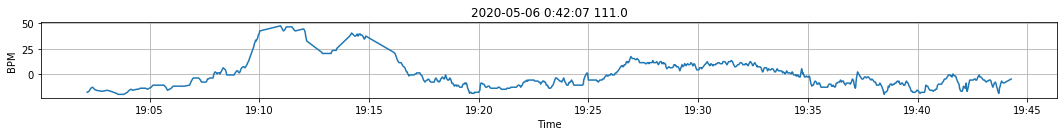

item: 37 topFrequncies (*1E3,FS=1): [9.91 0.62] theirPeriods [ 101. 1615.] theirPower [32,312 48,115]


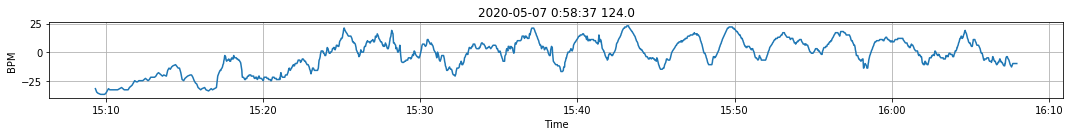

item: 68 topFrequncies (*1E3,FS=1): [3.14 1.57] theirPeriods [318. 636.] theirPower [44,215 88,451]


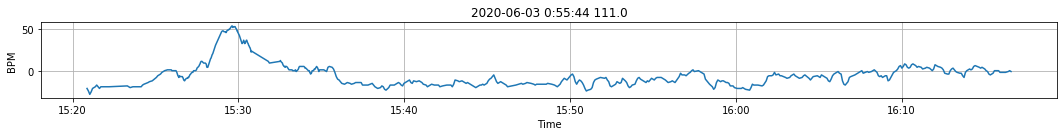

item: 84 topFrequncies (*1E3,FS=1): [0.79 3.94] theirPeriods [1269.  254.] theirPower [26,179 34,985]


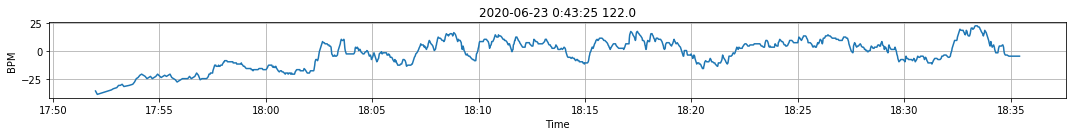

item: 86 topFrequncies (*1E3,FS=1): [1.27 0.63] theirPeriods [ 789. 1578.] theirPower [36,444 44,763]


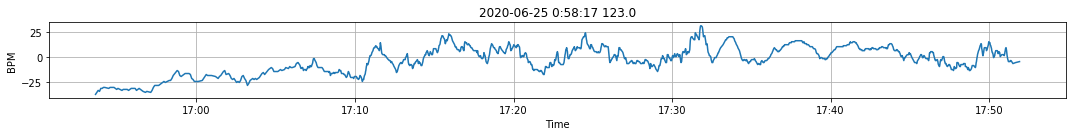

item: 92 topFrequncies (*1E3,FS=1): [8.12 0.58] theirPeriods [ 123. 1724.] theirPower [13,808 17,229]


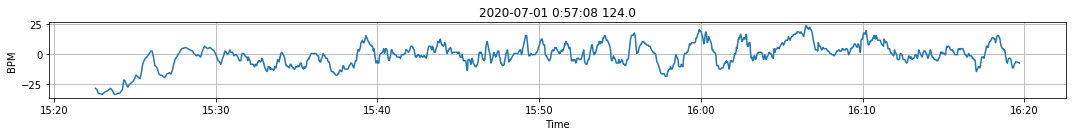

item: 105 topFrequncies (*1E3,FS=1): [3.48 2.32] theirPeriods [288. 432.] theirPower [16,843 54,350]


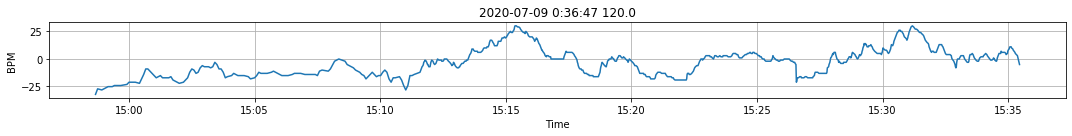

item: 116 topFrequncies (*1E3,FS=1): [11.14  0.66] theirPeriods [  90. 1526.] theirPower [20,509 77,382]


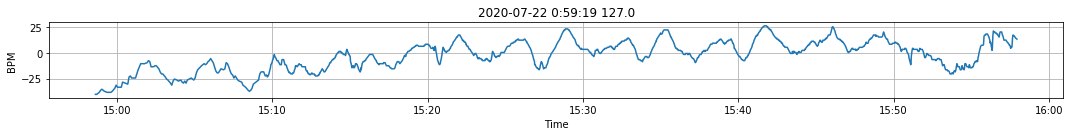

item: 136 topFrequncies (*1E3,FS=1): [1.41 0.71] theirPeriods [ 708. 1415.] theirPower [26,256 39,118]


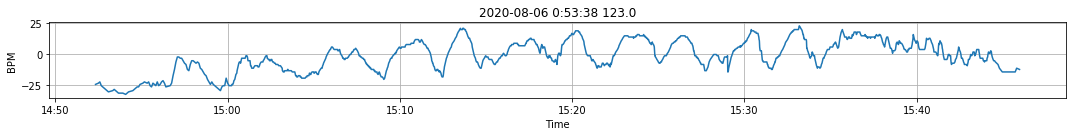

item: 150 topFrequncies (*1E3,FS=1): [4. 3.] theirPeriods [250. 334.] theirPower [21,061 24,226]


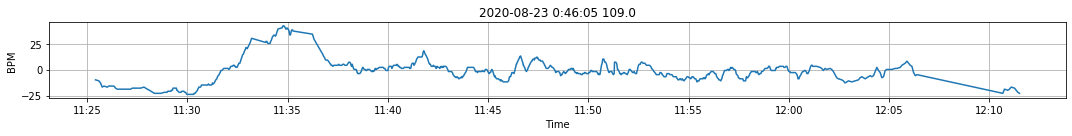

item: 170 topFrequncies (*1E3,FS=1): [6.06 0.67] theirPeriods [ 165. 1486.] theirPower [34,097 95,351]


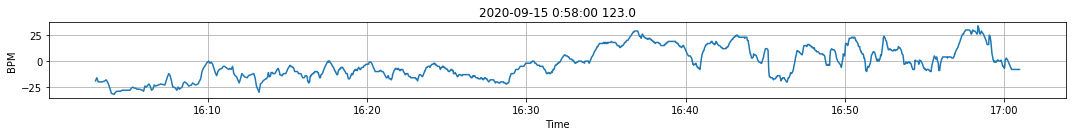

item: 181 topFrequncies (*1E3,FS=1): [7.71 5.14] theirPeriods [130. 194.] theirPower [36,163 45,351]


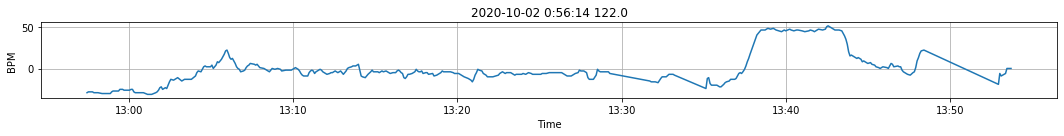

item: 183 topFrequncies (*1E3,FS=1): [3.12 6.23] theirPeriods [321. 160.] theirPower [31,250 38,776]


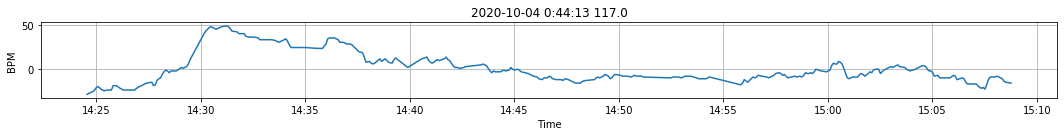

item: 185 topFrequncies (*1E3,FS=1): [8.06 4.03] theirPeriods [124. 248.] theirPower [33,082 94,915]


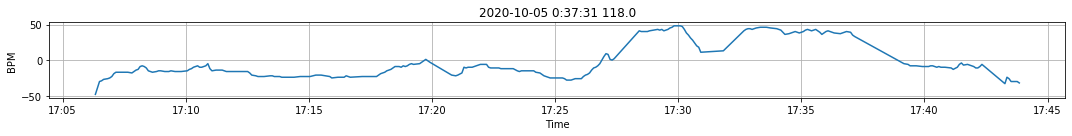

item: 186 topFrequncies (*1E3,FS=1): [5.1  2.55] theirPeriods [196. 392.] theirPower [38,976 53,160]


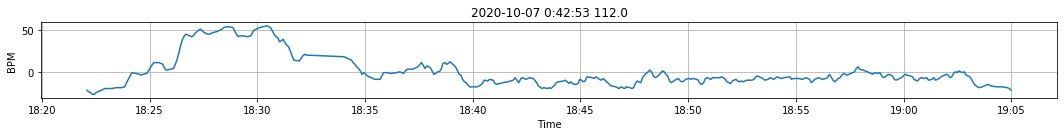

item: 188 topFrequncies (*1E3,FS=1): [2.47 4.94] theirPeriods [405. 202.] theirPower [44,265 87,211]


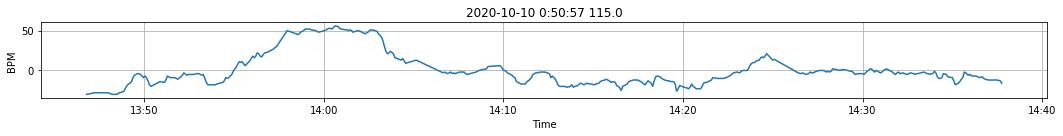

item: 191 topFrequncies (*1E3,FS=1): [9.06 6.04] theirPeriods [110. 166.] theirPower [19,464 92,669]


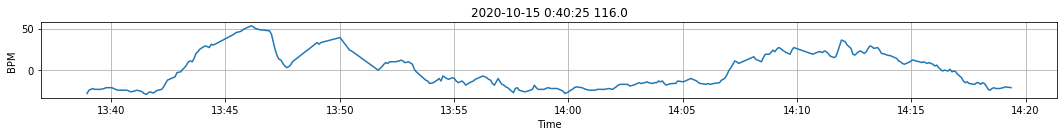

item: 223 topFrequncies (*1E3,FS=1): [4.4  1.47] theirPeriods [228. 682.] theirPower [6,693 13,034]


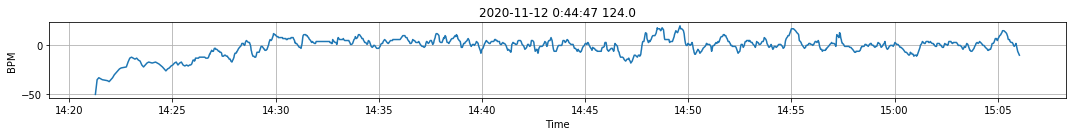

item: 229 topFrequncies (*1E3,FS=1): [1.13 0.56] theirPeriods [ 886. 1771.] theirPower [18,985 35,717]


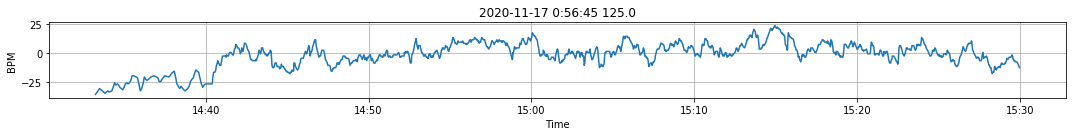

item: 235 topFrequncies (*1E3,FS=1): [0.62 1.23] theirPeriods [1623.  812.] theirPower [41,348 69,701]


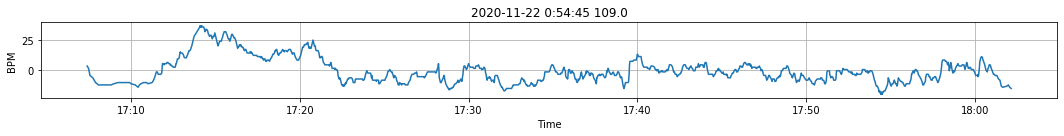

item: 242 topFrequncies (*1E3,FS=1): [0.81 4.03] theirPeriods [1242.  248.] theirPower [46,813 54,033]


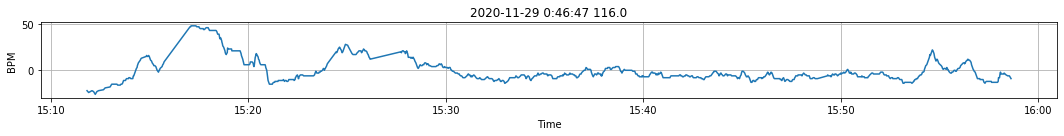

item: 250 topFrequncies (*1E3,FS=1): [2.17 0.72] theirPeriods [ 461. 1382.] theirPower [51,339 82,604]


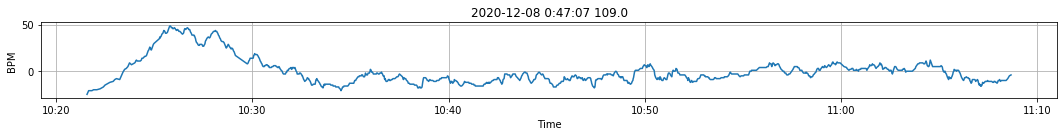

item: 261 topFrequncies (*1E3,FS=1): [ 5.32 10.64] theirPeriods [188.  94.] theirPower [11,504 123,129]


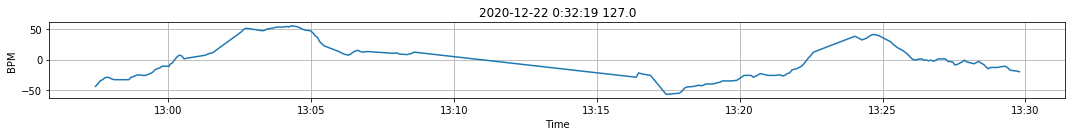

item: 263 topFrequncies (*1E3,FS=1): [6.1  3.05] theirPeriods [164. 328.] theirPower [46,021 68,419]


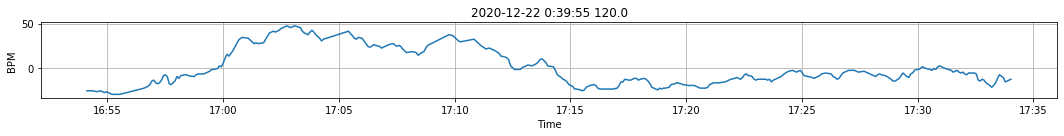

item: 267 topFrequncies (*1E3,FS=1): [1.55 2.32] theirPeriods [646. 430.] theirPower [27,381 29,887]


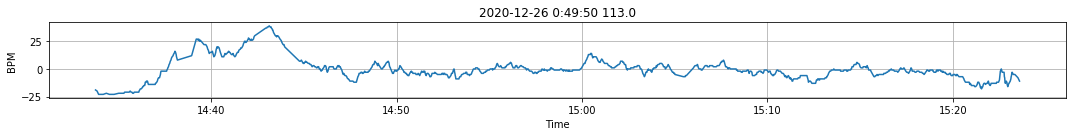

item: 281 topFrequncies (*1E3,FS=1): [1.42 2.12] theirPeriods [706. 471.] theirPower [80,714 85,521]


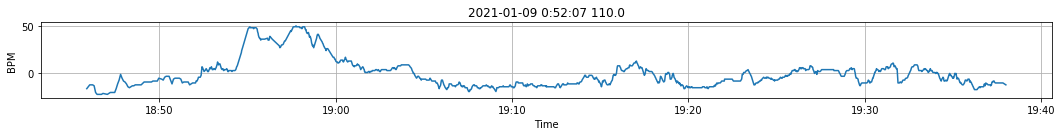

item: 283 topFrequncies (*1E3,FS=1): [7.19 2.16] theirPeriods [139. 464.] theirPower [15,551 46,686]


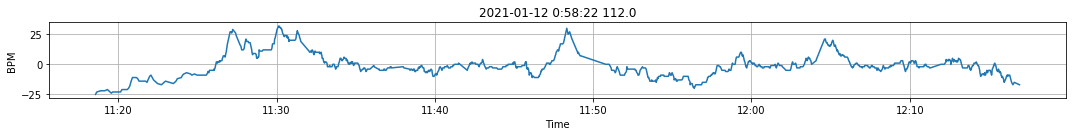

item: 284 topFrequncies (*1E3,FS=1): [2.09 1.05] theirPeriods [478. 956.] theirPower [40,325 48,319]


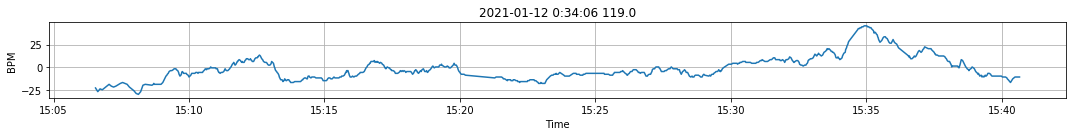

item: 288 topFrequncies (*1E3,FS=1): [2.   2.66] theirPeriods [501. 376.] theirPower [30,793 31,278]


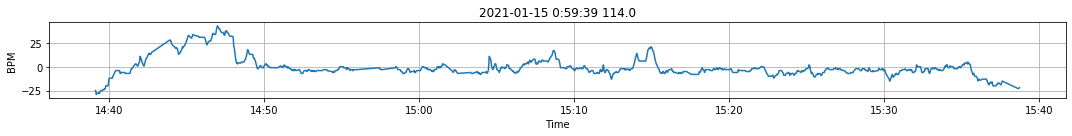

item: 289 topFrequncies (*1E3,FS=1): [0.68 1.35] theirPeriods [1477.  738.] theirPower [23,764 94,220]


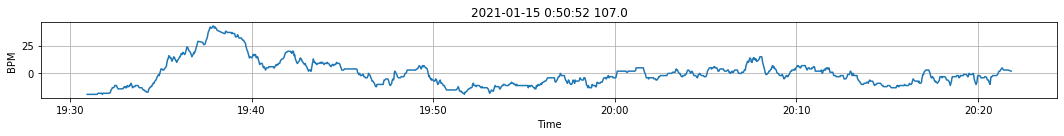

item: 310 topFrequncies (*1E3,FS=1): [0.88 1.76] theirPeriods [1138.  569.] theirPower [85,993 87,503]


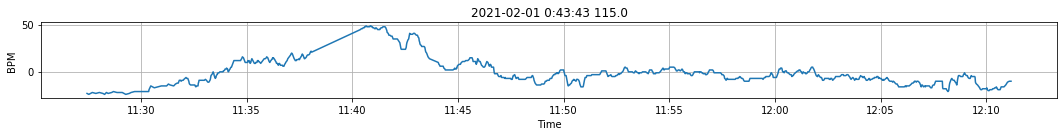

item: 316 topFrequncies (*1E3,FS=1): [2.6  1.73] theirPeriods [385. 578.] theirPower [100,598 107,834]


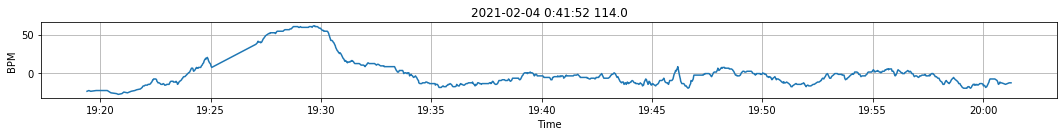

item: 318 topFrequncies (*1E3,FS=1): [3.87 1.29] theirPeriods [258. 774.] theirPower [24,817 61,694]


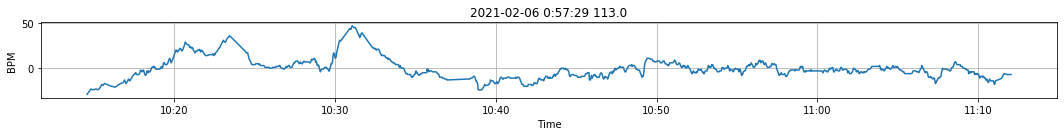

item: 326 topFrequncies (*1E3,FS=1): [3.1  1.55] theirPeriods [322. 645.] theirPower [60,204 96,825]


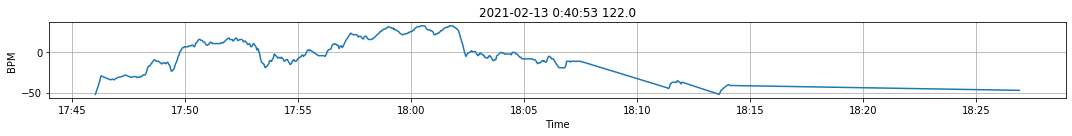

item: 327 topFrequncies (*1E3,FS=1): [1.4 0.7] theirPeriods [ 712. 1425.] theirPower [39,429 261,481]


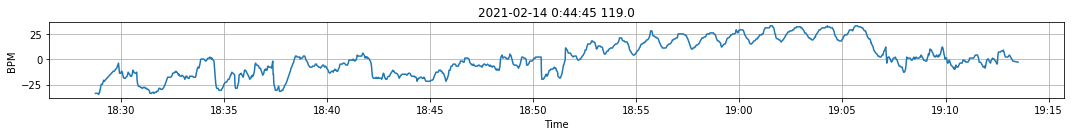

item: 328 topFrequncies (*1E3,FS=1): [0.65 1.95] theirPeriods [1540.  513.] theirPower [69,653 79,880]


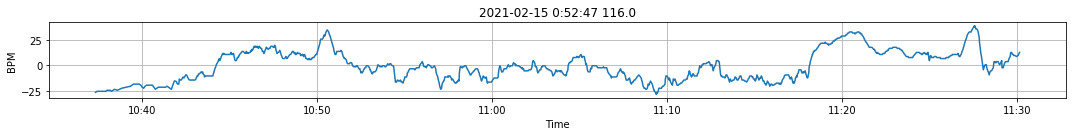

item: 330 topFrequncies (*1E3,FS=1): [3.83 1.28] theirPeriods [261. 783.] theirPower [16,497 68,647]


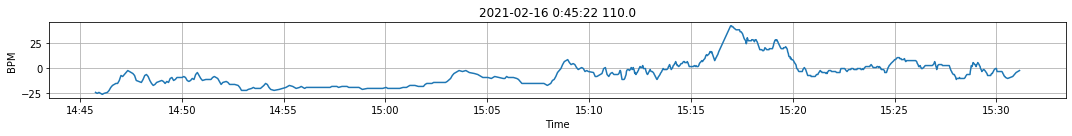

item: 331 topFrequncies (*1E3,FS=1): [1.52 0.76] theirPeriods [ 659. 1318.] theirPower [82,952 164,021]


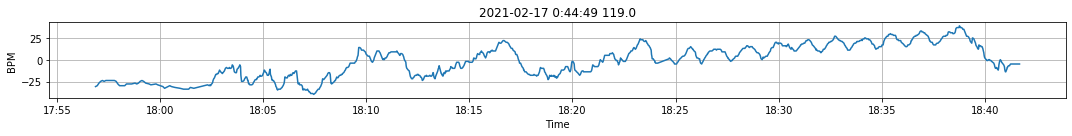

item: 333 topFrequncies (*1E3,FS=1): [1.   4.02] theirPeriods [996. 249.] theirPower [26,015 37,144]


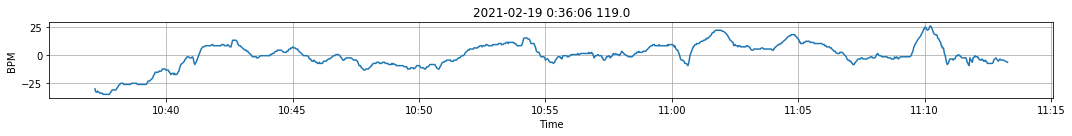

item: 334 topFrequncies (*1E3,FS=1): [0.98 1.97] theirPeriods [1017.  508.] theirPower [63,726 64,462]


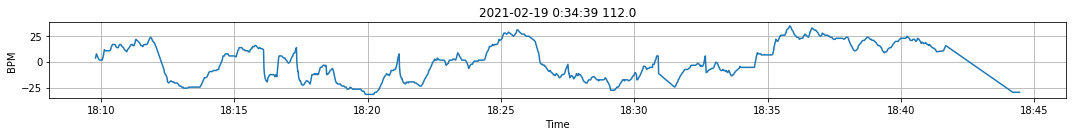

item: 337 topFrequncies (*1E3,FS=1): [0.75 1.49] theirPeriods [1339.  670.] theirPower [76,559 105,301]


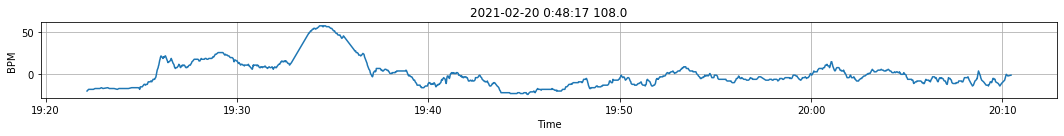

item: 350 topFrequncies (*1E3,FS=1): [1.25 0.62] theirPeriods [ 802. 1604.] theirPower [71,813 148,225]


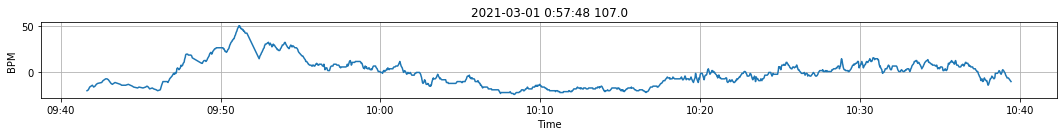

In [13]:
nFrequencies=2
np.set_printoptions(formatter={'int_kind': '{:,}'.format})
    
i=-1
for (df,summary) in zip(DFs,Summaries):
    i+=1
    # I am interested in cycling intervals; I know that these were activities which took between
    # 20 and 60 minutes and included much peakZone heart rates; so anything else is skipped
    if  summary['duration']<pd.Timedelta("20 minutes") \
        or summary['duration']>pd.Timedelta("60 minutes") \
        or summary['peakZone']<50  :
        #print('Duration and peakZone',summary['duration'],summary['peakZone'])
        continue
        
    length=len(df)
    t = np.arange(start=0, stop=length, step=1)
    m=df['BPM'].mean()
    x = df['BPM']-m 
    
    (frequncies,power)=signal.periodogram(x,fs=1,return_onesided=True)  
    topFrequencies=np.argpartition(power, -nFrequencies)[-nFrequencies:]
    print('item:',i,'topFrequncies (*1E3,FS=1):', (frequncies[topFrequencies].round(5))*1000,\
          'theirPeriods',(1/frequncies[topFrequencies]).round(0), \
          'theirPower',power[topFrequencies].astype(np.int64) )
    plotHeartRateWithTime(df,summary)
    
# END for (df,s)  

In [14]:
# The activities that their charts show cylces are the following (being optimistic in identifying cycling)
#
intervalIndex=[37,68, 84,86, 92, 105, 116, 136, 150, 170, 223, 229, 250, 327, 331, 334]
intervalSummaries= []
for i in intervalIndex:
    intervalSummaries.append(Summaries[i])
print(len(intervalSummaries))

16


In [15]:
x1=[d['date'] for d in Summaries]
y1=[d['peakZone'] for d in Summaries]

x2=[d['date'] for d in intervalSummaries]
y2=[d['peakZone'] for d in intervalSummaries]

In [16]:
myFormat = DateFormatter("%d-%m")
register_matplotlib_converters(myFormat)

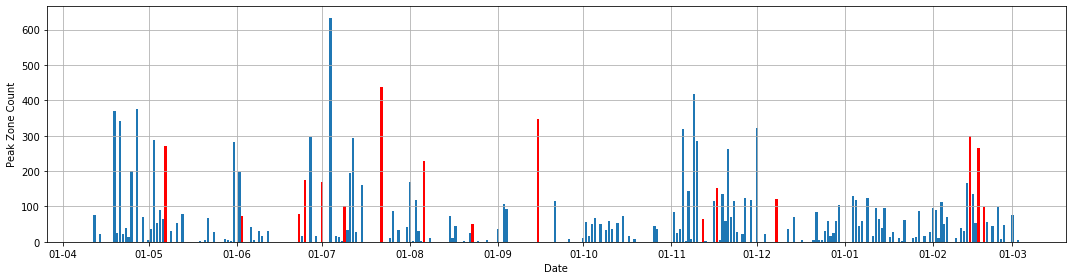

In [17]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(15, 4) )
axs.bar(x1,y1)
axs.bar(x2,y2,color='red') # the red bar covers the blue bar at the same date
axs.set_xlabel('Date')
axs.set_ylabel('Peak Zone Count')
axs.grid(True)  
axs.xaxis.set_major_formatter(myFormat)

fig.tight_layout()
plt.show()